# 우리 동네 인구 구조 시각화 하기
https://jumin.mois.go.kr/index.jsp#


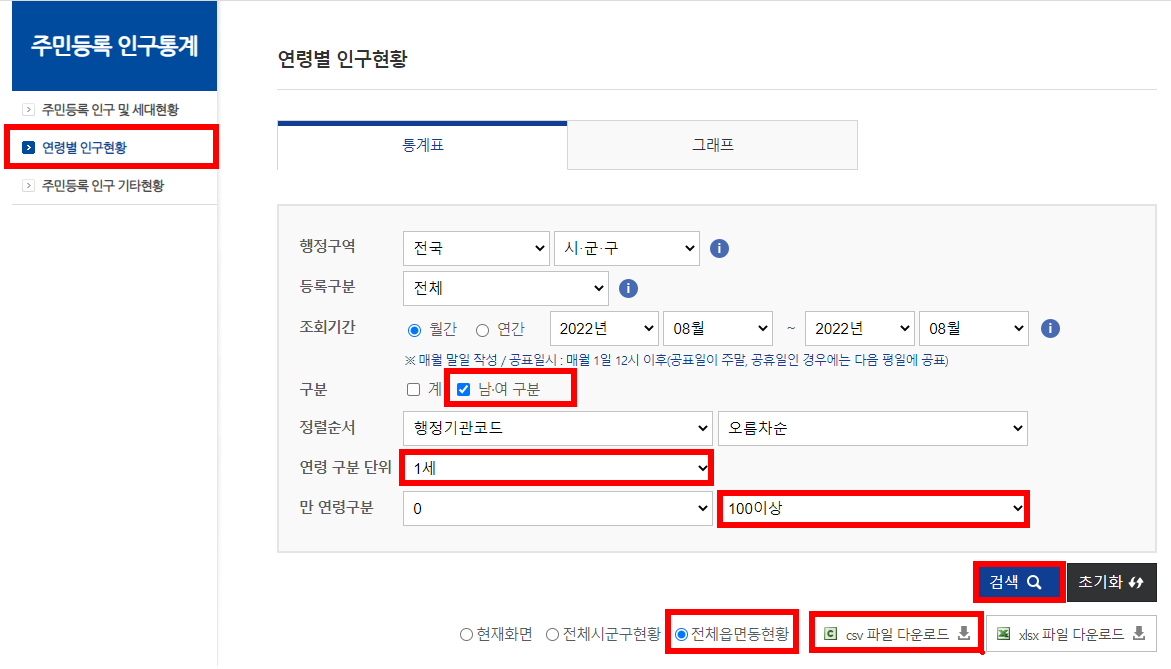

## 데이터 기초 정보 파악

In [1]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# 데이터 로드
# df = pd.read_csv('./data/population.csv', encoding='utf-8-sig')
# df = pd.read_csv('./data/population.csv', encoding='utf-8')
df = pd.read_csv('./data/population2.csv', encoding='euc-kr')
# df = pd.read_csv('./data/population2.csv', encoding='cp949')

In [23]:
df.head()

,행정구역,2022년08월_남_총인구수,2022년08월_남_연령구간인구수,2022년08월_남_0세,2022년08월_남_1세,2022년08월_남_2세,2022년08월_남_3세,2022년08월_남_4세,2022년08월_남_5세,2022년08월_남_6세,...,2022년08월_여_91세,2022년08월_여_92세,2022년08월_여_93세,2022년08월_여_94세,2022년08월_여_95세,2022년08월_여_96세,2022년08월_여_97세,2022년08월_여_98세,2022년08월_여_99세,2022년08월_여_100세 이상
0,서울특별시 (1100000000),"4,601,295","4,601,295","21,115","23,013","23,458","25,684","26,926","29,115","33,125",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,서울특별시 종로구 (1111000000),"69,408","69,408",232,248,270,261,299,320,426,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),"5,392","5,392",24,24,28,21,27,44,47,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),"4,124","4,124",17,14,15,21,24,30,37,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),"1,130","1,130",2,3,2,2,4,4,6,...,1,5,0,2,0,0,1,0,0,2


In [24]:
df.info() # 관측치 3867 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Columns: 207 entries, 행정구역 to 2022년08월_여_100세 이상
dtypes: int64(8), object(199)
memory usage: 6.1+ MB


In [25]:
df.columns

Index(['행정구역', '2022년08월_남_총인구수', '2022년08월_남_연령구간인구수', '2022년08월_남_0세',
       '2022년08월_남_1세', '2022년08월_남_2세', '2022년08월_남_3세', '2022년08월_남_4세',
       '2022년08월_남_5세', '2022년08월_남_6세',
       ...
       '2022년08월_여_91세', '2022년08월_여_92세', '2022년08월_여_93세', '2022년08월_여_94세',
       '2022년08월_여_95세', '2022년08월_여_96세', '2022년08월_여_97세', '2022년08월_여_98세',
       '2022년08월_여_99세', '2022년08월_여_100세 이상'],
      dtype='object', length=207)

In [26]:
# 컬럼명을 조회해서 이름 규칙을 찾고, 컬럼명을 수정해야할지 생각해보기.
for col in df.columns :
    print(col)

행정구역
2022년08월_남_총인구수
2022년08월_남_연령구간인구수
2022년08월_남_0세
2022년08월_남_1세
2022년08월_남_2세
2022년08월_남_3세
2022년08월_남_4세
2022년08월_남_5세
2022년08월_남_6세
2022년08월_남_7세
2022년08월_남_8세
2022년08월_남_9세
2022년08월_남_10세
2022년08월_남_11세
2022년08월_남_12세
2022년08월_남_13세
2022년08월_남_14세
2022년08월_남_15세
2022년08월_남_16세
2022년08월_남_17세
2022년08월_남_18세
2022년08월_남_19세
2022년08월_남_20세
2022년08월_남_21세
2022년08월_남_22세
2022년08월_남_23세
2022년08월_남_24세
2022년08월_남_25세
2022년08월_남_26세
2022년08월_남_27세
2022년08월_남_28세
2022년08월_남_29세
2022년08월_남_30세
2022년08월_남_31세
2022년08월_남_32세
2022년08월_남_33세
2022년08월_남_34세
2022년08월_남_35세
2022년08월_남_36세
2022년08월_남_37세
2022년08월_남_38세
2022년08월_남_39세
2022년08월_남_40세
2022년08월_남_41세
2022년08월_남_42세
2022년08월_남_43세
2022년08월_남_44세
2022년08월_남_45세
2022년08월_남_46세
2022년08월_남_47세
2022년08월_남_48세
2022년08월_남_49세
2022년08월_남_50세
2022년08월_남_51세
2022년08월_남_52세
2022년08월_남_53세
2022년08월_남_54세
2022년08월_남_55세
2022년08월_남_56세
2022년08월_남_57세
2022년08월_남_58세
2022년08월_남_59세
2022년08월_남_60세
2022년08월_남_61세
2022년08월_남_62세
2022년08월_남_63세
2022년08월_남

In [27]:
# 컬럼명 전체의 이름 변경. 일부 변경은 rename이 더 유용하고, 전체 변경은 replace로 접근하는 것이 더 유용함.

#컬럼명 2022년08월_ 삭제
df.columns.str.replace('2022년08월_','')

Index(['행정구역', '남_총인구수', '남_연령구간인구수', '남_0세', '남_1세', '남_2세', '남_3세', '남_4세',
       '남_5세', '남_6세',
       ...
       '여_91세', '여_92세', '여_93세', '여_94세', '여_95세', '여_96세', '여_97세', '여_98세',
       '여_99세', '여_100세 이상'],
      dtype='object', length=207)

In [28]:
df.columns  #  원본은 그대로 유지됨

Index(['행정구역', '2022년08월_남_총인구수', '2022년08월_남_연령구간인구수', '2022년08월_남_0세',
       '2022년08월_남_1세', '2022년08월_남_2세', '2022년08월_남_3세', '2022년08월_남_4세',
       '2022년08월_남_5세', '2022년08월_남_6세',
       ...
       '2022년08월_여_91세', '2022년08월_여_92세', '2022년08월_여_93세', '2022년08월_여_94세',
       '2022년08월_여_95세', '2022년08월_여_96세', '2022년08월_여_97세', '2022년08월_여_98세',
       '2022년08월_여_99세', '2022년08월_여_100세 이상'],
      dtype='object', length=207)

In [29]:
df.columns = df.columns.str.replace('2022년08월_','') # 메모리에 올려주어 원본 변화
df.columns

Index(['행정구역', '남_총인구수', '남_연령구간인구수', '남_0세', '남_1세', '남_2세', '남_3세', '남_4세',
       '남_5세', '남_6세',
       ...
       '여_91세', '여_92세', '여_93세', '여_94세', '여_95세', '여_96세', '여_97세', '여_98세',
       '여_99세', '여_100세 이상'],
      dtype='object', length=207)

In [30]:
df.head()

,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),"4,601,295","4,601,295","21,115","23,013","23,458","25,684","26,926","29,115","33,125",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,서울특별시 종로구 (1111000000),"69,408","69,408",232,248,270,261,299,320,426,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),"5,392","5,392",24,24,28,21,27,44,47,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),"4,124","4,124",17,14,15,21,24,30,37,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),"1,130","1,130",2,3,2,2,4,4,6,...,1,5,0,2,0,0,1,0,0,2


In [ ]:
# ---------------

In [30]:
#전처리한 데이터프레임 저장 : 인덱스를 제외하고 새로 저장
df.to_csv('./data/population_new4.csv', index = False)

In [31]:
df=pd.read_csv('./data/population_new4.csv')
df.head()

,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),"4,601,295","4,601,295","21,115","23,013","23,458","25,684","26,926","29,115","33,125",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,서울특별시 종로구 (1111000000),"69,408","69,408",232,248,270,261,299,320,426,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),"5,392","5,392",24,24,28,21,27,44,47,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),"4,124","4,124",17,14,15,21,24,30,37,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),"1,130","1,130",2,3,2,2,4,4,6,...,1,5,0,2,0,0,1,0,0,2


In [19]:
#전처리한 데이터프레임 저장
df.to_csv('./data/population2_new3.csv')

In [20]:
# 불필요한 컬럼이 존재함
df = pd.read_csv('./data/population2_new3.csv')
df.head()

,Unnamed: 0,행정구역,2022년08월_남_총인구수,2022년08월_남_연령구간인구수,2022년08월_남_0세,2022년08월_남_1세,2022년08월_남_2세,2022년08월_남_3세,2022년08월_남_4세,2022년08월_남_5세,...,2022년08월_여_91세,2022년08월_여_92세,2022년08월_여_93세,2022년08월_여_94세,2022년08월_여_95세,2022년08월_여_96세,2022년08월_여_97세,2022년08월_여_98세,2022년08월_여_99세,2022년08월_여_100세 이상
0,0,서울특별시 (1100000000),"4,601,295","4,601,295","21,115","23,013","23,458","25,684","26,926","29,115",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,1,서울특별시 종로구 (1111000000),"69,408","69,408",232,248,270,261,299,320,...,126,104,78,77,49,29,20,13,15,28
2,2,서울특별시 종로구 청운효자동(1111051500),"5,392","5,392",24,24,28,21,27,44,...,13,4,6,5,2,3,0,2,1,2
3,3,서울특별시 종로구 사직동(1111053000),"4,124","4,124",17,14,15,21,24,30,...,13,8,8,3,2,4,3,0,3,0
4,4,서울특별시 종로구 삼청동(1111054000),"1,130","1,130",2,3,2,2,4,4,...,1,5,0,2,0,0,1,0,0,2


In [21]:
# 인덱스로 사용할 컬럼을 지정해서 읽어줌
df=pd.read_csv('./data/population2_new3.csv',index_col=0)
df

,행정구역,2022년08월_남_총인구수,2022년08월_남_연령구간인구수,2022년08월_남_0세,2022년08월_남_1세,2022년08월_남_2세,2022년08월_남_3세,2022년08월_남_4세,2022년08월_남_5세,2022년08월_남_6세,...,2022년08월_여_91세,2022년08월_여_92세,2022년08월_여_93세,2022년08월_여_94세,2022년08월_여_95세,2022년08월_여_96세,2022년08월_여_97세,2022년08월_여_98세,2022년08월_여_99세,2022년08월_여_100세 이상
0,서울특별시 (1100000000),"4,601,295","4,601,295","21,115","23,013","23,458","25,684","26,926","29,115","33,125",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,서울특별시 종로구 (1111000000),"69,408","69,408",232,248,270,261,299,320,426,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),"5,392","5,392",24,24,28,21,27,44,47,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),"4,124","4,124",17,14,15,21,24,30,37,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),"1,130","1,130",2,3,2,2,4,4,6,...,1,5,0,2,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,제주특별자치도 서귀포시 서홍동(5013058000),"5,551","5,551",37,41,44,52,51,58,74,...,8,3,4,6,0,2,0,0,2,1
3863,제주특별자치도 서귀포시 대륜동(5013059000),"7,854","7,854",63,76,92,80,82,86,86,...,11,14,6,6,5,4,2,1,5,7
3864,제주특별자치도 서귀포시 대천동(5013060000),"7,011","7,011",57,56,64,63,86,93,107,...,8,17,3,8,4,4,0,1,1,2
3865,제주특별자치도 서귀포시 중문동(5013061000),"6,200","6,200",41,28,53,45,44,49,62,...,8,9,9,6,4,4,1,0,2,2


In [32]:
# 남자만 출력
df.iloc[:,[3,104]] #[x] 2개만 보여준다

,남_0세,여_총인구수
0,"21,115","4,887,159"
1,232,"74,091"
2,24,"6,374"
3,17,"5,154"
4,2,"1,254"
...,...,...
3862,37,"5,702"
3863,63,"7,675"
3864,57,"6,826"
3865,41,"6,044"


In [33]:
# 남자만 출력
df.iloc[:, 3:104]

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
0,"21,115","23,013","23,458","25,684","26,926","29,115","33,125","34,405","34,172","35,784",...,"2,102","1,649","1,474",978,664,392,301,240,246,414
1,232,248,270,261,299,320,426,399,415,451,...,52,37,44,13,26,18,12,9,8,15
2,24,24,28,21,27,44,47,44,46,51,...,2,3,1,0,4,1,3,1,0,1
3,17,14,15,21,24,30,37,45,24,36,...,3,1,10,2,4,4,2,2,1,1
4,2,3,2,2,4,4,6,7,4,7,...,2,2,1,1,2,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,37,41,44,52,51,58,74,86,75,80,...,4,1,1,1,0,0,0,1,0,1
3863,63,76,92,80,82,86,86,103,89,81,...,4,3,1,2,0,0,0,0,0,0
3864,57,56,64,63,86,93,107,101,88,92,...,2,1,0,1,1,1,0,0,0,1
3865,41,28,53,45,44,49,62,68,47,67,...,4,1,4,0,0,1,0,0,0,0


In [34]:
# 여자만 출력
df.iloc[:, 106:]

,여_0세,여_1세,여_2세,여_3세,여_4세,여_5세,여_6세,여_7세,여_8세,여_9세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,"19,816","21,718","22,053","23,561","25,352","27,939","31,868","32,984","32,286","33,944",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,212,236,260,284,281,336,395,382,445,440,...,126,104,78,77,49,29,20,13,15,28
2,24,22,20,31,25,36,39,44,53,44,...,13,4,6,5,2,3,0,2,1,2
3,17,16,21,22,21,33,32,24,48,29,...,13,8,8,3,2,4,3,0,3,0
4,2,4,3,3,9,4,6,6,6,7,...,1,5,0,2,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,42,40,34,51,61,66,82,89,84,86,...,8,3,4,6,0,2,0,0,2,1
3863,58,47,58,61,74,89,80,93,69,89,...,11,14,6,6,5,4,2,1,5,7
3864,43,46,54,57,64,86,104,90,112,72,...,8,17,3,8,4,4,0,1,1,2
3865,36,35,35,48,36,45,59,56,65,70,...,8,9,9,6,4,4,1,0,2,2


In [35]:
df.isnull().sum() # 결측치 0건

행정구역         0
남_총인구수       0
남_연령구간인구수    0
남_0세         0
남_1세         0
            ..
여_96세        0
여_97세        0
여_98세        0
여_99세        0
여_100세 이상    0
Length: 207, dtype: int64

In [36]:
df.info() #object(199)로 이루어져 계산할 때 불편 -> 타입 변경 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Columns: 207 entries, 행정구역 to 여_100세 이상
dtypes: int64(8), object(199)
memory usage: 6.1+ MB


In [37]:
# 형변환: df.['컬럼명'].astype('자료형')

# 전체컬럼을 형변환할 수 있을까?
df.astype('int64')

ValueError: invalid literal for int() with base 10: '서울특별시  (1100000000)'

In [38]:
df.iloc[:, 1:]

,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,"4,601,295","4,601,295","21,115","23,013","23,458","25,684","26,926","29,115","33,125","34,405",...,"5,718","4,987","4,157","3,135","2,326","1,504","1,032",773,704,"1,292"
1,"69,408","69,408",232,248,270,261,299,320,426,399,...,126,104,78,77,49,29,20,13,15,28
2,"5,392","5,392",24,24,28,21,27,44,47,44,...,13,4,6,5,2,3,0,2,1,2
3,"4,124","4,124",17,14,15,21,24,30,37,45,...,13,8,8,3,2,4,3,0,3,0
4,"1,130","1,130",2,3,2,2,4,4,6,7,...,1,5,0,2,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,"5,551","5,551",37,41,44,52,51,58,74,86,...,8,3,4,6,0,2,0,0,2,1
3863,"7,854","7,854",63,76,92,80,82,86,86,103,...,11,14,6,6,5,4,2,1,5,7
3864,"7,011","7,011",57,56,64,63,86,93,107,101,...,8,17,3,8,4,4,0,1,1,2
3865,"6,200","6,200",41,28,53,45,44,49,62,68,...,8,9,9,6,4,4,1,0,2,2


In [39]:
df.iloc[:, 1:].astype('int64')

ValueError: invalid literal for int() with base 10: '4,601,295'

In [43]:
#전처리한 데이터프레임 저장 : 인덱스를 제외하고 저장, 콤마제외하고 읽음
df.to_csv('./data/population_new1.csv',index=False)
df=pd.read_csv('./data/population_new1.csv',thousands=',')

# 행정구역을 index_col로 정하고 로드

In [44]:
df.head()

,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),4601295,4601295,21115,23013,23458,25684,26926,29115,33125,...,5718,4987,4157,3135,2326,1504,1032,773,704,1292
1,서울특별시 종로구 (1111000000),69408,69408,232,248,270,261,299,320,426,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),5392,5392,24,24,28,21,27,44,47,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),4124,4124,17,14,15,21,24,30,37,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),1130,1130,2,3,2,2,4,4,6,...,1,5,0,2,0,0,1,0,0,2


In [45]:
# 행정구역을 index_col로 정하고 로드
df = pd.read_csv('./data/population_new.csv', index_col=0, thousands=',') 
df.head()

,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),4601295,4601295,21115,23013,23458,25684,26926,29115,33125,34405,...,5718,4987,4157,3135,2326,1504,1032,773,704,1292
서울특별시 종로구 (1111000000),69408,69408,232,248,270,261,299,320,426,399,...,126,104,78,77,49,29,20,13,15,28
서울특별시 종로구 청운효자동(1111051500),5392,5392,24,24,28,21,27,44,47,44,...,13,4,6,5,2,3,0,2,1,2
서울특별시 종로구 사직동(1111053000),4124,4124,17,14,15,21,24,30,37,45,...,13,8,8,3,2,4,3,0,3,0
서울특별시 종로구 삼청동(1111054000),1130,1130,2,3,2,2,4,4,6,7,...,1,5,0,2,0,0,1,0,0,2


In [ ]:
df.info() # int형 -> 수치형데이터로 사용 가능

## 데이터 전처리
* 불필요 데이터 삭제
* 컬럼0번째를 인덱스로 설정

In [ ]:
# 행정구역을 index_col로 정하고 로드


> **[데이터에 대한 질문]**
> * 종로구의 인구구조는 어떨까?
> * 부산시 남구 문현동의 인구구조는 어떨가?
>   
>   

In [47]:
# 불필요한 데이터 삭제
#남_총인구수,남_연령구간인구수
#여_총인구수,여_연령구간인구수
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']

In [48]:
df.head()

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),21115,23013,23458,25684,26926,29115,33125,34405,34172,35784,...,5718,4987,4157,3135,2326,1504,1032,773,704,1292
서울특별시 종로구 (1111000000),232,248,270,261,299,320,426,399,415,451,...,126,104,78,77,49,29,20,13,15,28
서울특별시 종로구 청운효자동(1111051500),24,24,28,21,27,44,47,44,46,51,...,13,4,6,5,2,3,0,2,1,2
서울특별시 종로구 사직동(1111053000),17,14,15,21,24,30,37,45,24,36,...,13,8,8,3,2,4,3,0,3,0
서울특별시 종로구 삼청동(1111054000),2,3,2,2,4,4,6,7,4,7,...,1,5,0,2,0,0,1,0,0,2


In [ ]:

# 아름동이 있는지 확인
name = '아름동'



In [54]:
df.columns[0].str.contains('아름동')

AttributeError: 'str' object has no attribute 'str'

In [51]:

df['행정구역'].str.contains('아름동')

KeyError: '행정구역'

In [52]:
df.columns

Index(['남_0세', '남_1세', '남_2세', '남_3세', '남_4세', '남_5세', '남_6세', '남_7세', '남_8세',
       '남_9세',
       ...
       '여_91세', '여_92세', '여_93세', '여_94세', '여_95세', '여_96세', '여_97세', '여_98세',
       '여_99세', '여_100세 이상'],
      dtype='object', length=202)

In [53]:
df.iloc[0,0]

21115

In [61]:
df.index.str.contains('아름동')

array([False, False, False, ..., False, False, False])

In [57]:
# 아름동이 있는지 확인 -> 컬럼이 아닌 인덱스로 접근
mytown = df[df.index.str.contains('아름동')]
mytown

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
세종특별자치시 아름동(3611053000),97,103,91,128,141,160,182,212,213,203,...,3,6,5,2,2,3,2,0,1,0


# 우리동네 연령별 인구구조
* 남, 여 데이터 각각 추출

In [58]:
#남여 데이터 추출
male = mytown.iloc[:,0:101]
female = mytown.iloc[:,101:202]

In [59]:
male

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
세종특별자치시 아름동(3611053000),97,103,91,128,141,160,182,212,213,203,...,0,1,1,2,1,0,0,0,0,1


In [70]:
male.shape, female.shape # 만녀 데이터는 각각 101건씩 있는 상태

((1, 101), (1, 101))

In [64]:
male.iloc[0,0]

97

In [65]:
male.iloc[0,1]

103

In [67]:
type(male.iloc[0,1])

numpy.int64

In [60]:
female

,여_0세,여_1세,여_2세,여_3세,여_4세,여_5세,여_6세,여_7세,여_8세,여_9세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
세종특별자치시 아름동(3611053000),81,116,108,141,119,156,175,171,173,225,...,3,6,5,2,2,3,2,0,1,0


In [76]:
#연령별 남여 합계 계산
total = []

for i in range(0,101):
    # print(male.iloc[0,i])
    total.append((male.iloc[0,i]) + (female.iloc[0,i]))

total


[178,
 219,
 199,
 269,
 260,
 316,
 357,
 383,
 386,
 428,
 493,
 515,
 499,
 490,
 468,
 426,
 425,
 390,
 392,
 322,
 284,
 284,
 232,
 179,
 130,
 127,
 120,
 149,
 147,
 197,
 205,
 227,
 239,
 279,
 258,
 324,
 323,
 385,
 403,
 431,
 520,
 578,
 630,
 584,
 582,
 573,
 567,
 570,
 613,
 538,
 462,
 494,
 399,
 354,
 324,
 248,
 210,
 221,
 164,
 195,
 181,
 228,
 178,
 165,
 140,
 112,
 130,
 121,
 107,
 84,
 83,
 53,
 80,
 65,
 58,
 55,
 30,
 34,
 29,
 31,
 28,
 29,
 14,
 21,
 24,
 20,
 14,
 16,
 15,
 5,
 6,
 3,
 7,
 6,
 4,
 3,
 3,
 2,
 0,
 1,
 1]

In [77]:
male.iloc[0,0], female.iloc[0,0], total[0]

(97, 81, 178)

## line 차트

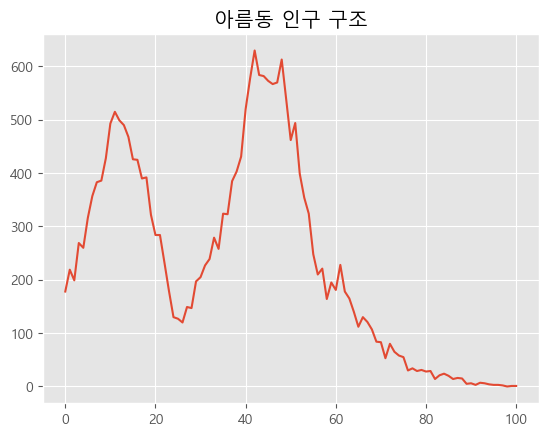

In [79]:
name = '아름동'

plt.figure()
plt.style.use('ggplot') # 테마스타일
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.plot(total)

plt.show()

> * 젊은 부부가 많이 사는 동네로 보입니다. 
> * 어린아이와 40대가 많이 살고 있고, 
> * 반면 노년층이 적습니다. 

>* 아름동: 세종시 신도시

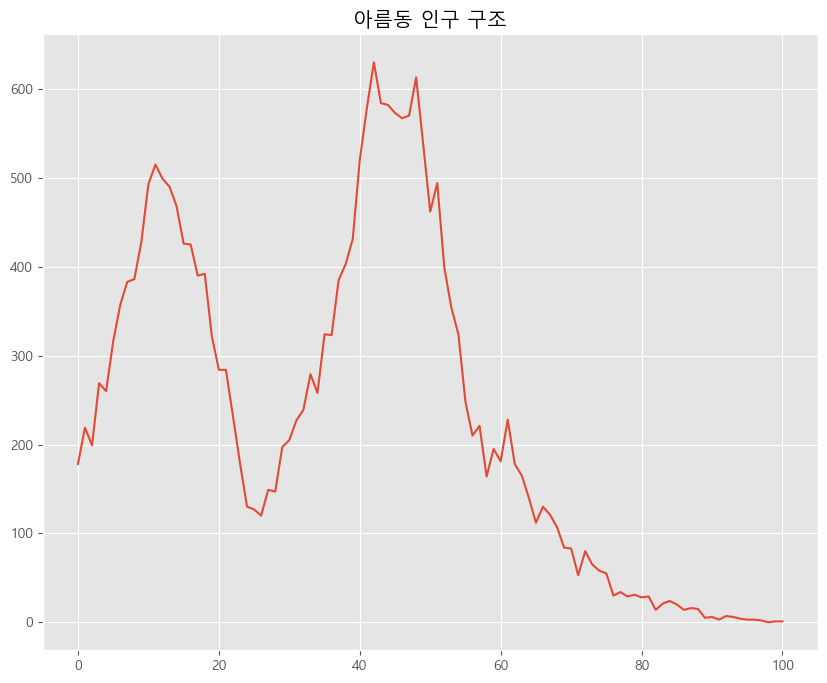

In [80]:
name = '아름동'

plt.figure(figsize=(10,8)) # 그래프 사이즈 
plt.style.use('ggplot') # 테마스타일
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.plot(total)

plt.show()

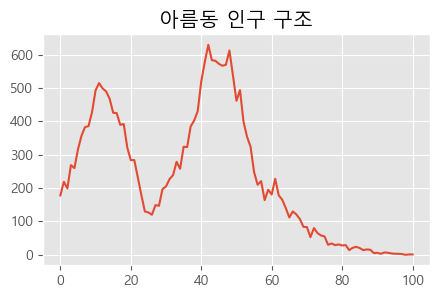

In [81]:
name = '아름동'

plt.figure(figsize=(5,3)) # 그래프 사이즈 
plt.style.use('ggplot') # 테마스타일
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.plot(total)

plt.show()

---
## 종합코드

In [4]:
# 아름동 코드 종합

#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('./data/population2.csv', encoding='euc-kr')

# 전처리
df.columns = df.columns.str.replace('2022년08월_','') # 컬럼명 수정

#전처리한 데이터프레임 저장
df.to_csv('./data/population_new5.csv')
df = pd.read_csv('./data/population_new5.csv', index_col=0, thousands=',') 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수'] 
del df['여_총인구수'], df['여_연령구간인구수']

# 동네 이름 
name = '아름동'
# mytown = df[df.index.str.contains('아름동')]
mytown = df[df['행정구역'].str.contains('아름동')]

#남여 데이터 추출
male = mytown.iloc[:,0:101]
female = mytown.iloc[:,101:202]

#연령별 남여 합계 계산
total = []

for i in range(0,101):
    total.append((male.iloc[0,i]) + (female.iloc[0,i]))

TypeError: can only concatenate str (not "numpy.int64") to str

In [5]:
# 아름동 코드 종합

#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('./data/population2.csv', encoding='euc-kr')

# 전처리
df.columns = df.columns.str.replace('2022년08월_','') # 컬럼명 수정

#전처리한 데이터프레임 저장
df.to_csv('./data/population_new1.csv')
df = pd.read_csv('./data/population_new1.csv', index_col=0, thousands=',') 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수'] 
del df['여_총인구수'], df['여_연령구간인구수']

# 동네 이름 
name = '아름동'
mytown = df[df['행정구역'].str.contains('아름동')]

#남여 데이터 추출
male = mytown.iloc[:,1:102]
female = mytown.iloc[:,102:203]

#연령별 남여 합계 계산
total = []

for i in range(0,101):
    # print(male.iloc[0,i])
    total.append((male.iloc[0,i]) + (female.iloc[0,i]))

df.head()

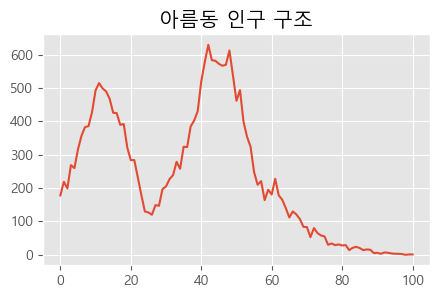

In [14]:
plt.figure(figsize=(5,3)) # 그래프 사이즈 
plt.style.use('ggplot') # 테마스타일
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.plot(total)

plt.show()

In [8]:
df.head()

,행정구역,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),21115,23013,23458,25684,26926,29115,33125,34405,34172,...,5718,4987,4157,3135,2326,1504,1032,773,704,1292
1,서울특별시 종로구 (1111000000),232,248,270,261,299,320,426,399,415,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),24,24,28,21,27,44,47,44,46,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),17,14,15,21,24,30,37,45,24,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),2,3,2,2,4,4,6,7,4,...,1,5,0,2,0,0,1,0,0,2


In [85]:
#남산동 인구 종합

#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('./data/busan_population.csv', encoding='euc-kr')

# 전처리
df.columns = df.columns.str.replace('2022년08월_','') # 컬럼명 수정

#전처리한 데이터프레임 저장
df.to_csv('./data/busan_population_new.csv')
df = pd.read_csv('./data/busan_population_new.csv', index_col=0, thousands=',') 
del df['남_총인구수'], df['남_연령구간인구수'] # 불필요한 데이터 삭제
del df['여_총인구수'], df['여_연령구간인구수']

In [87]:
df.head()

,행정구역,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),21115,23013,23458,25684,26926,29115,33125,34405,34172,...,5718,4987,4157,3135,2326,1504,1032,773,704,1292
1,서울특별시 종로구 (1111000000),232,248,270,261,299,320,426,399,415,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),24,24,28,21,27,44,47,44,46,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),17,14,15,21,24,30,37,45,24,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),2,3,2,2,4,4,6,7,4,...,1,5,0,2,0,0,1,0,0,2


In [88]:
name = '남산동'
mytown = df['행정구역'].str.contains('남산동')

In [94]:
mytown

0       False
1       False
2       False
3       False
4       False
        ...  
3862    False
3863    False
3864    False
3865    False
3866    False
Name: 행정구역, Length: 3867, dtype: bool

In [96]:
df[df['행정구역'].str.contains('남산동')]

,행정구역,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
618,부산광역시 금정구 남산동(2641067000),32,34,39,37,44,54,57,80,64,...,26,18,16,7,4,6,2,6,3,5
3190,경상북도 김천시 평화남산동(4715053600),6,8,7,10,8,10,13,11,13,...,10,9,4,5,7,4,0,0,2,1


In [93]:
male.iloc[0,0]

97

In [98]:
mytown

,행정구역,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
618,부산광역시 금정구 남산동(2641067000),32,34,39,37,44,54,57,80,64,...,26,18,16,7,4,6,2,6,3,5
3190,경상북도 김천시 평화남산동(4715053600),6,8,7,10,8,10,13,11,13,...,10,9,4,5,7,4,0,0,2,1


In [100]:
mytown.iloc[0,0]

'부산광역시 금정구 남산동(2641067000)'

In [101]:
mytown.iloc[0,1]

32

In [102]:
mytown.iloc[0,101]

2

In [103]:
mytown.iloc[0,102]

30

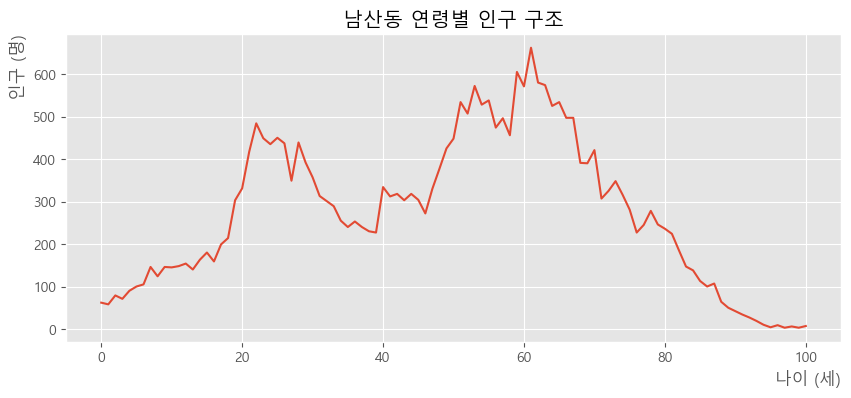

In [111]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('./data/busan_population.csv', encoding='euc-kr')

# 전처리
df.columns = df.columns.str.replace('2022년08월_','') # 컬럼명 수정

#전처리한 데이터프레임 저장
df.to_csv('./data/busan_population_new.csv')
df = pd.read_csv('./data/busan_population_new.csv', index_col=0, thousands=',') 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수'] 
del df['여_총인구수'], df['여_연령구간인구수']

# 동네 이름 
name = '남산동'
mytown = df[df['행정구역'].str.contains('남산동')]
# mytown = df[df.index.str.contains('남산동')]

#남여 데이터 추출
male = mytown.iloc[:,1:102]
female = mytown.iloc[:,102:203]

#연령별 남여 합계 계산
total = []

for i in range(0,101):
    # print(male.iloc[0,i])
    total.append((male.iloc[0,i]) + (female.iloc[0,i]))

# 시각화 : line 차트
plt.figure(figsize=(10,4)) # 그래프 사이즈 
plt.style.use('ggplot') # 테마스타일
plt.rc('font', family = "Malgun Gothic") # 한글사용
plt.rcParams['axes.unicode_minus']=False # 마이너스 부호 깨짐

plt.title('{} 연령별 인구 구조'.format(name))
plt.xlabel('나이 (세)', loc='right')
plt.ylabel('인구 (명)', loc='top')

plt.plot(total)
plt.show()



### 분석 내용
* 유아인구가 적습니다. 근 10년간을 보았을 때 신생아 출생 수가 줄어들고 있습니다. 이로 인해 최근 인근 유치원이 잇따른 폐원이 있었으며, 학원 등의 교육 산업에 영향을 줄 것으로 예상합니다.

* 부산외대가 위치하여 20대 인구는 비교적 많습니다.
* 대학가 자취많음. 1인가구 밀키트사업이 잘될듯.

*20대인구가 30대가 되기전에 해당 동네르 떠나는 것으로 보아, 학생인구가 정착하기엔 산업적으로 활발하지 않은 것으로 보입니다.

* 40대 노동인구가 적습니다 부모세대가 적기때문에 출생률이 낮은 것에 영향을 준 것으로 추측합니다.

* 50~60대 장년 인구가 가장 많고, 70대 이상의 노년인구 역시 많은 편입니다 
그러므로  한의원 등의 의료시설 이용이 많고 요양보호사가 많이 필요할 것으로 보입니다.

* 20대인구와 노년층인구가 많은 것으로 보아 1인가구 비중이 높을 것으로 예상됩니다. 

In [ ]:
# 궁금한 지역의 이름을 입력받는다. -> 있으면 그래프 보여주고, 없으면 없다고 출력.

# 지금까지 pandas 라이브러리 사용법을 살펴보았습니다. 이제 Unit 14에서 파이썬 기본 문법과 numpy 라이브러리를 활용해서 만들었던 데이터 프로젝트를 pandas 라이브러리로 구현해 보겠습니다. 알고리즘은 Unit 14에서 작성했던 것을 그대로 가져왔습니다.

# 1 | 데이터를 읽어온다.

# ➊ 전체 데이터를 총 인구수로 나누어 비율로 변환한다.

# ➋ 총인구수와 연령구간인구수를 삭제한다.

# 2 | 궁금한 지역의 이름을 입력받는다.

# 3 | 궁금한 지역의 인구 구조를 저장한다.

# 4 | 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.

# ➊ 전국의 모든 지역 중 한 곳(B)을 선택한다.

# ➋ 궁금한 지역 A의 0세 인구 비율에서 B의 0세 인구 비율을 뺀다.

# ➌ ➋를 100세 이상 인구수에 해당하는 값까지 반복한 후 차이의 제곱을 모두 더한다.

# ➍ 전국의 모든 지역에 대해 반복하며 그 차이가 가장 작은 지역을 찾는다.

# 5 | 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화한다.

## 원하는 도시의 인구구조 구하기

In [ ]:
# -----------------
# 컬럼의 데이터 빈도수 세기

population_number['2015'].value_counts()

In [112]:
df

,행정구역,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),21115,23013,23458,25684,26926,29115,33125,34405,34172,...,5718,4987,4157,3135,2326,1504,1032,773,704,1292
1,서울특별시 종로구 (1111000000),232,248,270,261,299,320,426,399,415,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),24,24,28,21,27,44,47,44,46,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),17,14,15,21,24,30,37,45,24,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),2,3,2,2,4,4,6,7,4,...,1,5,0,2,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,제주특별자치도 서귀포시 서홍동(5013058000),37,41,44,52,51,58,74,86,75,...,8,3,4,6,0,2,0,0,2,1
3863,제주특별자치도 서귀포시 대륜동(5013059000),63,76,92,80,82,86,86,103,89,...,11,14,6,6,5,4,2,1,5,7
3864,제주특별자치도 서귀포시 대천동(5013060000),57,56,64,63,86,93,107,101,88,...,8,17,3,8,4,4,0,1,1,2
3865,제주특별자치도 서귀포시 중문동(5013061000),41,28,53,45,44,49,62,68,47,...,8,9,9,6,4,4,1,0,2,2


In [114]:
df['행정구역'] # 이름바꾸기 뒤에걸 잘라내야하나?

0                서울특별시  (1100000000)
1             서울특별시 종로구 (1111000000)
2        서울특별시 종로구 청운효자동(1111051500)
3          서울특별시 종로구 사직동(1111053000)
4          서울특별시 종로구 삼청동(1111054000)
                    ...             
3862    제주특별자치도 서귀포시 서홍동(5013058000)
3863    제주특별자치도 서귀포시 대륜동(5013059000)
3864    제주특별자치도 서귀포시 대천동(5013060000)
3865    제주특별자치도 서귀포시 중문동(5013061000)
3866    제주특별자치도 서귀포시 예래동(5013062000)
Name: 행정구역, Length: 3867, dtype: object

In [116]:
df[df['행정구역'].str.contains('부산')]

,행정구역,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
452,부산광역시 (2600000000),6955,7769,8336,9051,10499,11485,13153,13577,13530,...,2310,1841,1609,1289,885,531,407,245,231,349
453,부산광역시 중구 (2611000000),42,31,37,43,58,66,56,82,72,...,36,41,30,38,12,15,7,3,12,7
454,부산광역시 중구 중앙동(2611051000),2,1,1,3,3,3,2,2,2,...,1,2,3,4,0,1,0,0,1,1
455,부산광역시 중구 동광동(2611052000),2,2,0,5,3,2,4,5,2,...,5,3,3,6,1,1,0,1,1,0
456,부산광역시 중구 대청동(2611053000),2,4,2,10,8,9,11,16,6,...,7,10,7,9,5,5,3,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,부산광역시 기장군 장안읍(2671025300),20,24,22,29,15,17,16,17,27,...,14,9,6,2,6,8,2,3,3,3
671,부산광역시 기장군 정관읍(2671025600),269,302,371,429,470,596,671,762,736,...,29,29,16,15,17,7,10,3,1,4
672,부산광역시 기장군 일광읍(2671025900),137,161,147,177,170,170,191,193,191,...,21,8,10,11,3,4,3,2,0,5
673,부산광역시 기장군 철마면(2671033000),13,7,9,13,14,16,26,26,19,...,10,6,6,5,3,1,0,4,0,2


In [117]:
df[df['행정구역'].str.contains('서울')] # 도시별 인구분포 비교하는 그래프. 검색하면 바로 그래프 출력하도록

,행정구역,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),21115,23013,23458,25684,26926,29115,33125,34405,34172,...,5718,4987,4157,3135,2326,1504,1032,773,704,1292
1,서울특별시 종로구 (1111000000),232,248,270,261,299,320,426,399,415,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),24,24,28,21,27,44,47,44,46,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),17,14,15,21,24,30,37,45,24,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),2,3,2,2,4,4,6,7,4,...,1,5,0,2,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,서울특별시 강동구 성내제2동(1174065000),57,39,42,42,49,53,56,48,46,...,9,8,9,10,6,0,3,1,2,5
448,서울특별시 강동구 성내제3동(1174066000),39,54,43,51,59,79,60,79,60,...,10,12,8,11,3,1,1,1,0,4
449,서울특별시 강동구 길동(1174068500),108,92,90,112,105,115,123,140,146,...,26,36,17,13,4,9,3,9,1,6
450,서울특별시 강동구 둔촌제1동(1174069000),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [118]:
city = input()
print(city+'의 인구 구조를 조사하겠습니다.') # 검색을 소리로 받아보면 어떨까?

서울의 인구 구조를 조사하겠습니다.


In [119]:
pwd = int(input('비밀번호 4자리를 입력하세요. : '))

if pwd == 1234:
    print('비밀번호가 일치합니다.')
else :
    print('비밀번호가 일치하지 않습니다.') 
    
    # 일정시간이 지나면 시간이 초과하여 프로그램을 종료합니다. 라고 말하기.

비밀번호가 일치하지 않습니다.


In [1]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('./data/busan_population.csv', encoding='euc-kr')

# 전처리
df.columns = df.columns.str.replace('2022년08월_','') # 컬럼명 수정

#전처리한 데이터프레임 저장
df.to_csv('./data/busan_population_new.csv')
df = pd.read_csv('./data/busan_population_new.csv', index_col=0, thousands=',') 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수'] 
del df['여_총인구수'], df['여_연령구간인구수']

In [2]:
# 동네 이름 
name = input('원하는 지역의 이름을 입력해주세요 :') # 지역 이름 입력 : 해운대
a = df['행정구역'].str.contains(name)
df2 = df[a]
df2

,행정구역,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
569,부산광역시 해운대구 (2635000000),777,862,995,1067,1252,1368,1581,1716,1691,...,252,224,181,172,104,64,49,28,29,41
570,부산광역시 해운대구 우제1동(2635051000),50,36,55,48,49,45,70,69,63,...,15,18,13,8,8,7,0,1,2,1
571,부산광역시 해운대구 우제2동(2635052000),59,99,114,121,153,157,161,186,160,...,20,19,17,19,6,9,3,3,1,6
572,부산광역시 해운대구 우제3동(2635052500),68,99,98,121,134,156,181,197,180,...,13,8,12,12,8,6,5,1,2,1
573,부산광역시 해운대구 중제1동(2635053000),67,84,90,94,99,120,151,142,147,...,16,10,6,13,4,5,0,0,2,4
574,부산광역시 해운대구 중제2동(2635054000),42,44,45,56,59,71,53,66,72,...,13,9,6,1,5,2,3,4,1,7
575,부산광역시 해운대구 좌제1동(2635055100),27,36,41,40,45,50,72,61,81,...,8,11,7,6,3,0,1,0,2,1
576,부산광역시 해운대구 좌제2동(2635055200),79,68,86,84,83,101,123,108,122,...,22,18,8,9,5,6,3,5,2,1
577,부산광역시 해운대구 좌제3동(2635055300),40,27,39,34,47,50,57,68,60,...,20,15,8,8,6,0,3,1,3,1
578,부산광역시 해운대구 좌제4동(2635055400),55,45,60,60,86,84,98,128,109,...,13,13,10,7,8,1,5,1,3,3


In [11]:
# 동네 이름 
name = input('원하는 지역의 이름을 입력해주세요 :') # 지역 이름 입력 : 재송제2동
a = df['행정구역'].str.contains(name)
town = df[a] #df2
town


,행정구역,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
587,부산광역시 해운대구 재송제2동(2635066000),35,36,36,55,51,53,58,71,62,...,10,11,14,10,6,2,3,2,3,2


In [16]:
town.iloc[0,0]

'부산광역시 해운대구 재송제2동(2635066000)'

In [12]:
male = town.iloc[:,1:102]
female = town.iloc[:,102:203]

In [13]:
#연령별 남여 합계 계산
total = []

for i in range(0,101):
    # print(male.iloc[0,i])
    total.append((male.iloc[0,i]) + (female.iloc[0,i]))

# 결과값이 1개가 아닐땐? 결과가 안나올떈?

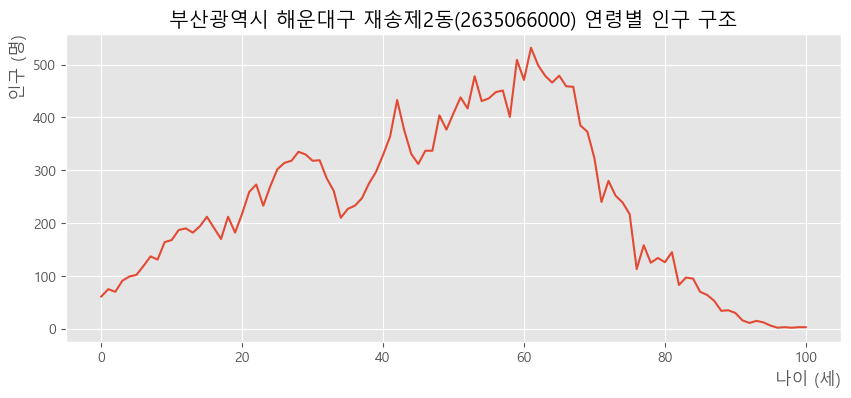

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4)) # 그래프 사이즈 
plt.style.use('ggplot') # 테마스타일
plt.rc('font', family = "Malgun Gothic") # 한글사용
plt.rcParams['axes.unicode_minus']=False # 마이너스 부호 깨짐

plt.title(f'{town.iloc[0,0]} 연령별 인구 구조')
plt.xlabel('나이 (세)', loc='right')
plt.ylabel('인구 (명)', loc='top')

plt.plot(total)
plt.show()

In [ ]:
# ----------------------------------

## 궁금한 지역의 인구 조사와 가장 비슷한 인구구조

In [2]:
import numpy as np
# x = df.sub(town.iloc[0,0], axis=1)

## Bar 차트
* bar차트는 두 종류의 값들이 입력됩니다. 
* bar(막대를 표시할 위치, 막대 높이)
* 두 종류의 값들은 개수가 일치해야 합니다. 

In [11]:
total

[178,
 219,
 199,
 269,
 260,
 316,
 357,
 383,
 386,
 428,
 493,
 515,
 499,
 490,
 468,
 426,
 425,
 390,
 392,
 322,
 284,
 284,
 232,
 179,
 130,
 127,
 120,
 149,
 147,
 197,
 205,
 227,
 239,
 279,
 258,
 324,
 323,
 385,
 403,
 431,
 520,
 578,
 630,
 584,
 582,
 573,
 567,
 570,
 613,
 538,
 462,
 494,
 399,
 354,
 324,
 248,
 210,
 221,
 164,
 195,
 181,
 228,
 178,
 165,
 140,
 112,
 130,
 121,
 107,
 84,
 83,
 53,
 80,
 65,
 58,
 55,
 30,
 34,
 29,
 31,
 28,
 29,
 14,
 21,
 24,
 20,
 14,
 16,
 15,
 5,
 6,
 3,
 7,
 6,
 4,
 3,
 3,
 2,
 0,
 1,
 1]

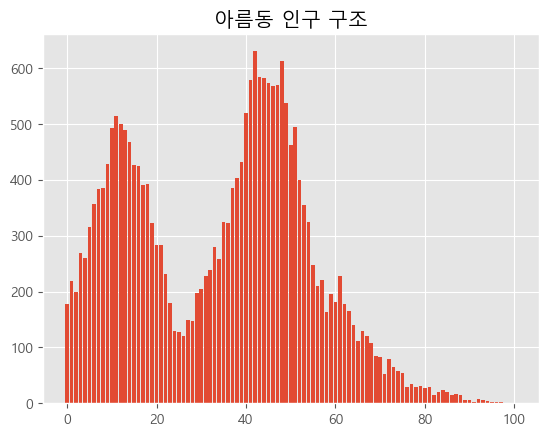

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title('{} 인구 구조'.format(name))

plt.bar(range(101),total)

plt.show()

## barh 차트

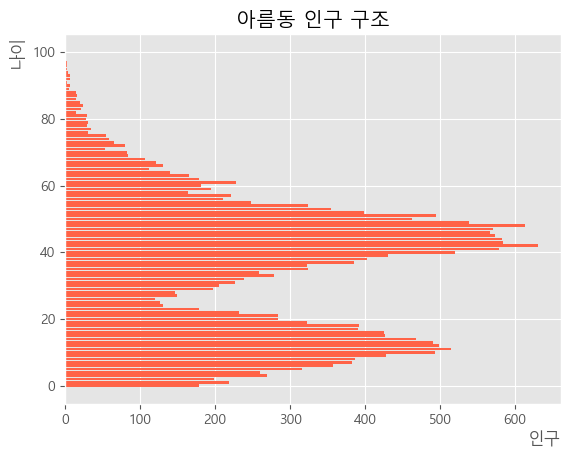

In [21]:

plt.figure()
# plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title(f'{name} 인구 구조')
plt.xlabel('인구', loc='right')
plt.ylabel('나이', loc='top')

plt.barh(range(101), total, color = 'tomato')

plt.show()

## 진짜 우리동네 인구구조

In [ ]:


# 남산동 코드. 수행했다.





In [28]:
# 강사님 종합코드. 인덱스로 접근해야할 경우 종합코드.
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 행정구역을 index_col로 정하고 로드
df=pd.read_csv('./data/population2.csv',index_col=0, thousands=',')
# 불필요한 데이터 삭제
#남_총인구수,남_연령구간인구수
#여_총인구수,여_연령구간인구수
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']
name = '아름동'
mytown = df[df.index.str.contains(name)]
#남여 데이터 추출
male = mytown.iloc[:,0:101]
female = mytown.iloc[:,101:202]
#시각화
# plt.figure()
# # plt.style.use('ggplot')
# plt.rc('font', family = "Malgun Gothic") #한글사용
# plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐
# plt.title('{} 인구 구조'.format(name))
# plt.barh(range(101),total ,color='tomato')
# plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 1: invalid continuation byte

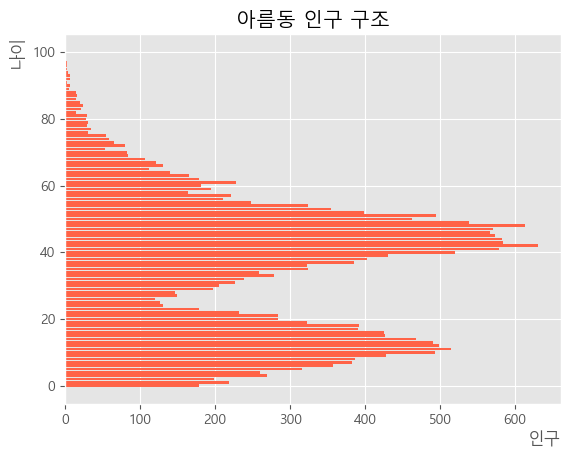

In [23]:
# 아름동 코드 종합

#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('./data/population2.csv', encoding='euc-kr')

# 전처리
df.columns = df.columns.str.replace('2022년08월_','') # 컬럼명 수정

#전처리한 데이터프레임 저장
df.to_csv('./data/population_new2.csv')
df = pd.read_csv('./data/population_new2.csv', index_col=0, thousands=',') 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수'] 
del df['여_총인구수'], df['여_연령구간인구수']

# 동네 이름 
name = '아름동'
mytown = df[df['행정구역'].str.contains('아름동')]

#남여 데이터 추출
male = mytown.iloc[:,1:102]
female = mytown.iloc[:,102:203]

#연령별 남여 합계 계산
total = []

for i in range(0,101):
    # print(male.iloc[0,i])
    total.append((male.iloc[0,i]) + (female.iloc[0,i]))

# 시각화
plt.figure()
# plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title(f'{name} 인구 구조')
plt.xlabel('인구', loc='right')
plt.ylabel('나이', loc='top')

plt.barh(range(101), total, color = 'tomato')
plt.show()

In [22]:
df.head()

,행정구역,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),21115,23013,23458,25684,26926,29115,33125,34405,34172,...,5718,4987,4157,3135,2326,1504,1032,773,704,1292
1,서울특별시 종로구 (1111000000),232,248,270,261,299,320,426,399,415,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),24,24,28,21,27,44,47,44,46,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),17,14,15,21,24,30,37,45,24,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),2,3,2,2,4,4,6,7,4,...,1,5,0,2,0,0,1,0,0,2


In [24]:
male.head()

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
1269,97,103,91,128,141,160,182,212,213,203,...,0,1,1,2,1,0,0,0,0,1


In [29]:
female.head()

,여_0세,여_1세,여_2세,여_3세,여_4세,여_5세,여_6세,여_7세,여_8세,여_9세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
1269,81,116,108,141,119,156,175,171,173,225,...,3,6,5,2,2,3,2,0,1,0


# 우리동네 남여 구조 

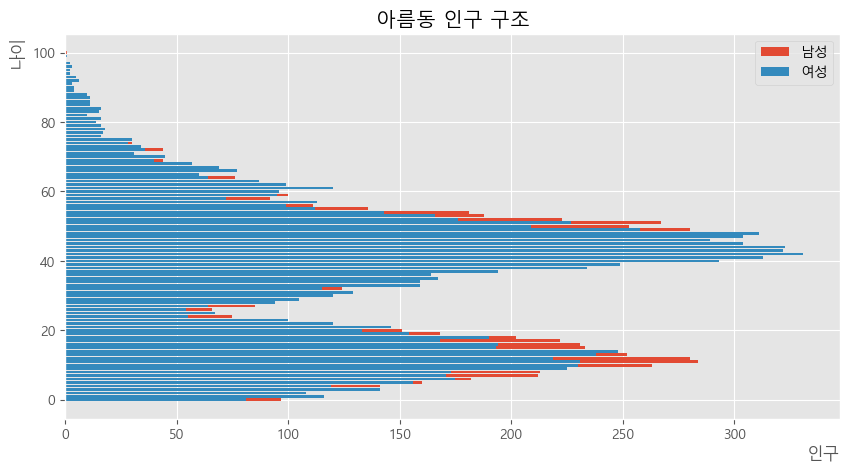

In [34]:
# 시각화
plt.figure(figsize=(10,5))
# plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title(f'{name} 인구 구조')
plt.xlabel('인구', loc='right')
plt.ylabel('나이', loc='top')

plt.barh(range(101), male.iloc[0], label = '남성')
plt.barh(range(101), female.iloc[0], label = '여성')
plt.legend() # 범례
plt.show()

## 모든 값 음수로 변환

> * 대칭하는 형태의 인구 피라미드 구조로 남녀인구를barh그래프로 표현.

In [51]:
# 아름동 코드 종합

#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('./data/population2.csv', encoding='euc-kr')

# 전처리
df.columns = df.columns.str.replace('2022년08월_','') # 컬럼명 수정

#전처리한 데이터프레임 저장
df.to_csv('./data/population_new4.csv')
df = pd.read_csv('./data/population_new4.csv', index_col=0, thousands=',') 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수'] 
del df['여_총인구수'], df['여_연령구간인구수']

# 동네 이름 
name = '아름동'
mytown = df[df['행정구역'].str.contains('아름동')]

#남여 데이터 추출
male = mytown.iloc[:,1:102]
female = mytown.iloc[:,102:203]

# 남자 음수로 변환
temp = male * -1


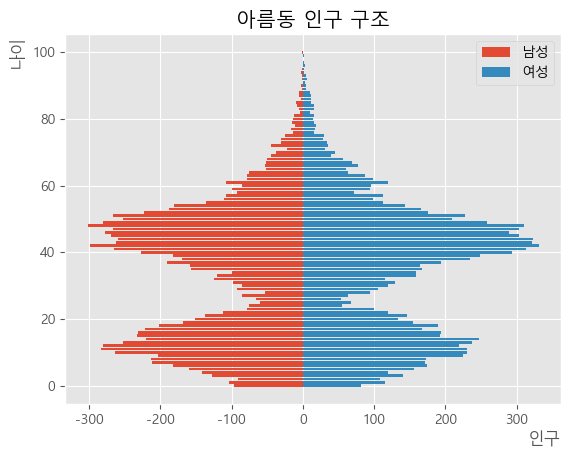

In [54]:
# 시각화
plt.figure()
# plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title(f'{name} 인구 구조')
plt.xlabel('인구', loc='right')
plt.ylabel('나이', loc='top')

plt.barh(range(101), temp.iloc[0], label = '남성')
plt.barh(range(101), female.iloc[0], label = '여성')

plt.legend()
plt.show()

In [46]:
for i in male: #[x]
    male*(-1)
male

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
1269,97,103,91,128,141,160,182,212,213,203,...,0,1,1,2,1,0,0,0,0,1


In [44]:
male

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
1269,97,103,91,128,141,160,182,212,213,203,...,0,1,1,2,1,0,0,0,0,1


In [43]:
male * -1

,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,남_7세,남_8세,남_9세,...,남_91세,남_92세,남_93세,남_94세,남_95세,남_96세,남_97세,남_98세,남_99세,남_100세 이상
1269,-97,-103,-91,-128,-141,-160,-182,-212,-213,-203,...,0,-1,-1,-2,-1,0,0,0,0,-1


> **[해석]**
> *    ㅇㅇㅇ

## 진짜 우리동네 남여 구조

In [55]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('./data/busan_population.csv', encoding='euc-kr')

# 전처리
df.columns = df.columns.str.replace('2022년08월_','') # 컬럼명 수정

#전처리한 데이터프레임 저장
df.to_csv('./data/busan_population_new2.csv')
df = pd.read_csv('./data/busan_population_new2.csv', index_col=0, thousands=',') 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수'] 
del df['여_총인구수'], df['여_연령구간인구수']

# 동네 이름 
name = '남산동'
mytown = df[df['행정구역'].str.contains('남산동')]

#남여 데이터 추출
male = mytown.iloc[:,1:102]
female = mytown.iloc[:,102:203]

# 남자 음수로 변환
temp = male * -1

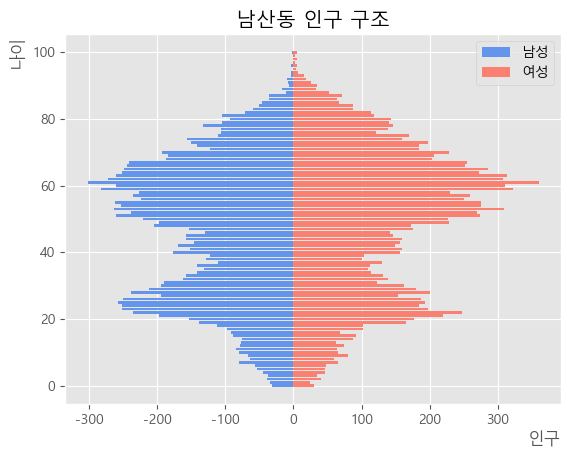

In [57]:
# 시각화
plt.figure()
# plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.title(f'{name} 인구 구조')
plt.xlabel('인구', loc='right')
plt.ylabel('나이', loc='top')

plt.barh(range(101), temp.iloc[0], label = '남성', color='cornflowerblue')
plt.barh(range(101), female.iloc[0], label = '여성', color='salmon')

plt.legend()
plt.show()

>* 해석
>* 전반적인 남녀 인구 비중이 비슷하게 보입니다.
>* 20대이하 유아 및 청소년 인구가 매우 적습니다.
>* 대학교가 위치하여 20대 학생 인구가 많고, 비교적 남학생의 비중이 더 높습니다.
>* 30대 인구가 줄어드는 것은 대학졸업 후에 해당 지역을 떠나기 때문입니다. 이 점으로 보아 청년층에게 유망한 산업군이 취약한 것으로 추정됩니다.
>* 40대 이후에는 가족단위 가정이 많을 것으로 추정됩니다.
>* 그러나 50대 이후의 여성인구가 남성인구에 비해 더 많은 양상을 보이는 점으로 보아 노년층 1인가구 비중이 상당할 것으로 추정됩니다. 
>* 60대 이후 여성인구의 비중이 더 높은 것으로 보아 남녀의 기대수명을 비교한다면 여성이 더 장수할 것으로 추정됩니다.
>* 전체적으로 젊은 인구가 줄어들고, 노년인구의 비중이 높으니, 
>* 해당 지역에서 유치원,학원 등의 교육관련 산업이 쇠퇴하고, 의료, 복지 등의 산업군이 더욱 증가할 것으로 추정됩니다.

# 바람부는 제주에는 정말 여성의 비율이 높을까?

## 데이터 로딩 및 전처리

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('./data/population_new_teacher.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

        
#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)]

mytown['남_총인구수']

## 중복데이터가 많이 나옴, 그중에서 0번째 데이터 사용할 것임


행정구역
제주특별자치도  (5000000000)           340105
제주특별자치도 제주시 (5011000000)        246892
제주특별자치도 제주시 한림읍(5011025000)      10897
제주특별자치도 제주시 애월읍(5011025300)      19253
제주특별자치도 제주시 구좌읍(5011025600)       7857
제주특별자치도 제주시 조천읍(5011025900)      13198
제주특별자치도 제주시 한경면(5011031000)       4758
제주특별자치도 제주시 추자면(5011032000)        848
제주특별자치도 제주시 우도면(5011033000)        892
제주특별자치도 제주시 일도1동(5011051000)      1235
제주특별자치도 제주시 일도2동(5011052000)     15772
제주특별자치도 제주시 이도1동(5011053000)      3766
제주특별자치도 제주시 이도2동(5011054000)     24124
제주특별자치도 제주시 삼도1동(5011055000)      6501
제주특별자치도 제주시 삼도2동(5011056000)      4087
제주특별자치도 제주시 용담1동(5011057000)      3543
제주특별자치도 제주시 용담2동(5011058000)      7247
제주특별자치도 제주시 건입동(5011059000)       4536
제주특별자치도 제주시 화북동(5011060000)      11882
제주특별자치도 제주시 삼양동(5011061000)      13227
제주특별자치도 제주시 봉개동(5011062000)       2722
제주특별자치도 제주시 아라동(5011063000)      19200
제주특별자치도 제주시 오라동(5011064000)       8132
제주특별자치도 제주시 연동(5011065000)       20779
제주특별자치도 제주시 노형동(5011066000)      27196
제주특별자치도 제주시 외도동(5011

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('./data/population_new.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 



In [61]:
df.head()

,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),4601295,4601295,21115,23013,23458,25684,26926,29115,33125,...,5718,4987,4157,3135,2326,1504,1032,773,704,1292
1,서울특별시 종로구 (1111000000),69408,69408,232,248,270,261,299,320,426,...,126,104,78,77,49,29,20,13,15,28
2,서울특별시 종로구 청운효자동(1111051500),5392,5392,24,24,28,21,27,44,47,...,13,4,6,5,2,3,0,2,1,2
3,서울특별시 종로구 사직동(1111053000),4124,4124,17,14,15,21,24,30,37,...,13,8,8,3,2,4,3,0,3,0
4,서울특별시 종로구 삼청동(1111054000),1130,1130,2,3,2,2,4,4,6,...,1,5,0,2,0,0,1,0,0,2


In [67]:
#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df['행정구역'].str.contains(name)]

In [68]:
mytown[['행정구역','남_총인구수']]

## 중복데이터가 많이 나옴, 그중에서 0번째 데이터 사용할 것임

,행정구역,남_총인구수
3821,제주특별자치도 (5000000000),340105
3822,제주특별자치도 제주시 (5011000000),246892
3823,제주특별자치도 제주시 한림읍(5011025000),10897
3824,제주특별자치도 제주시 애월읍(5011025300),19253
3825,제주특별자치도 제주시 구좌읍(5011025600),7857
3826,제주특별자치도 제주시 조천읍(5011025900),13198
3827,제주특별자치도 제주시 한경면(5011031000),4758
3828,제주특별자치도 제주시 추자면(5011032000),848
3829,제주특별자치도 제주시 우도면(5011033000),892
3830,제주특별자치도 제주시 일도1동(5011051000),1235


## pie 차트
* 전체 데이터 중 특정 데이터의 비율을 보기 쉽게 표현합니다. 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/population_new_teacher.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 
         

#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)]

m = mytown['남_총인구수'][0]
f = mytown['여_총인구수'][0]
m,f

(340105, 338911)

In [72]:
m = mytown['남_총인구수'][0]
f = mytown['여_총인구수'][0]
m,f

(340105, 338911)

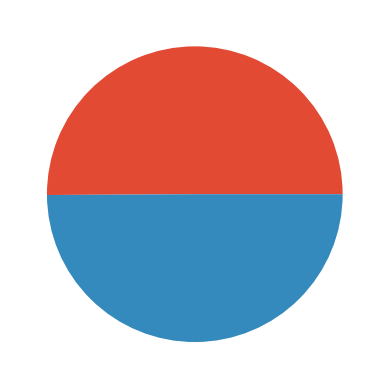

In [80]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

plt.pie([m,f]) # 남녀의 비율을 표시
plt.show()

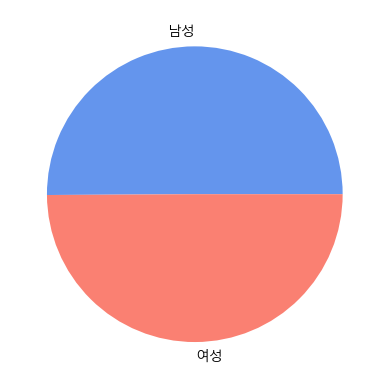

In [83]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

plt.pie([m,f], labels=['남성', '여성'], colors=['cornflowerblue', 'salmon']) 
# plt.legend()
plt.show()

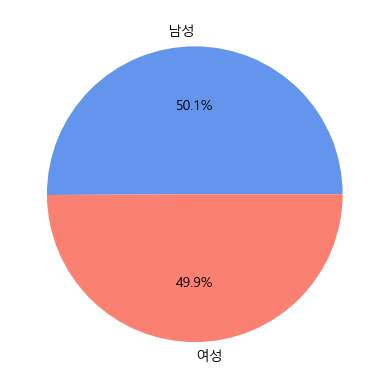

In [84]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

plt.pie([m,f], labels=['남성', '여성'], autopct='%.1f%%', colors=['cornflowerblue', 'salmon']) 
# autopct= %%사이에표기. 소수점한자리.1 실수f 특수문자%붙일 것
plt.show()

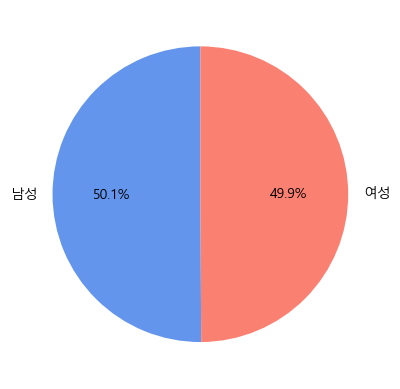

In [85]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

plt.pie([m,f], labels=['남성', '여성'], autopct='%.1f%%', startangle=90,colors=['cornflowerblue', 'salmon']) 
# 앵글 바꾸기 90도 : startangle=90 (디폴트는 0도)
plt.show()

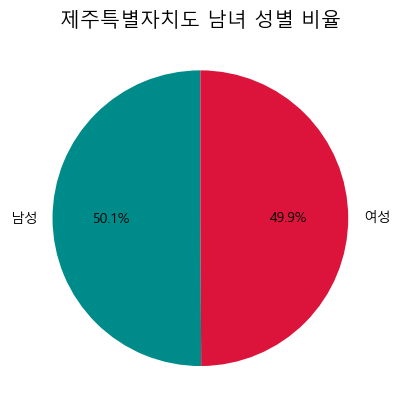

In [90]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

plt.pie([m,f], labels=['남성', '여성'], autopct='%.1f%%', startangle=90,colors=['darkcyan', 'crimson']) 
# 앵글 바꾸기 90도 : startangle=90 (디폴트는 0도)

plt.title(f'{name} 남녀 성별 비율')

plt.show()

> **[해석]**
>* 인식과 달리, 제주도의 남녀 비율이 거의 50:50으로 비슷합니다.
>* 심지어 남성의 인구가 약간 더 많음
>* 연령대별 성별 비율은 어떻게 되는 걸까?

## line: 제주특별자치도 남여 인구 구조¶

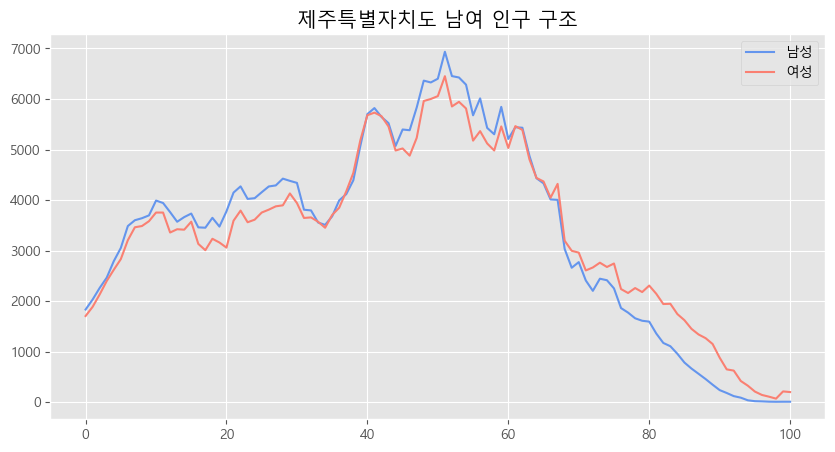

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/population_new_teacher.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

# print(male.shape)


plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

plt.title('{} 남여 인구 구조'.format(name))


plt.plot(range(101), male, label='남성', color='cornflowerblue')
plt.plot(range(101), female, label='여성', color='salmon')

plt.legend()
plt.show()

In [ ]:
# 60대 이하 생산 인구는 남성 비중이 더 높다. 해당 나이까지는 가정을 이룬 세대가 많을것으로 추정.
# 60대 이상은 여성인구가 더 높음. 여성의 수명이 더 길고, 노년층 여성 1인 가구의 수가 많을 것으로 추정.

> * 항아리 모양 그래프보다 남녀 인구의 차이가 눈에 더 잘 들어옵니다. 
> * 좀 더 차이가 한 눈에 들어오도록 한다면? (새로운 니즈가 생겼어요! 우리의 이슈는 제주도의 여성이 더 많을까?)

## bar:제주특별자치도 남여 인구 구조

* 남자-여자를 뺀 값으로  막대그래프 그려봄

### 데이터 로딩 및 전처리

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/population_new_teacher.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

print(male-female)

# 남자-여자 연산 실패 --> index값이 같이 않아서...


남_0세        NaN
남_100세 이상   NaN
남_10세       NaN
남_11세       NaN
남_12세       NaN
             ..
여_96세       NaN
여_97세       NaN
여_98세       NaN
여_99세       NaN
여_9세        NaN
Name: 제주특별자치도  (5000000000), Length: 202, dtype: float64


In [98]:
male.index

Index(['남_0세', '남_1세', '남_2세', '남_3세', '남_4세', '남_5세', '남_6세', '남_7세', '남_8세',
       '남_9세',
       ...
       '남_91세', '남_92세', '남_93세', '남_94세', '남_95세', '남_96세', '남_97세', '남_98세',
       '남_99세', '남_100세 이상'],
      dtype='object', length=101)

In [99]:
female.index

Index(['여_0세', '여_1세', '여_2세', '여_3세', '여_4세', '여_5세', '여_6세', '여_7세', '여_8세',
       '여_9세',
       ...
       '여_91세', '여_92세', '여_93세', '여_94세', '여_95세', '여_96세', '여_97세', '여_98세',
       '여_99세', '여_100세 이상'],
      dtype='object', length=101)

In [103]:
print(male-female)

남_0세        NaN
남_100세 이상   NaN
남_10세       NaN
남_11세       NaN
남_12세       NaN
             ..
여_96세       NaN
여_97세       NaN
여_98세       NaN
여_99세       NaN
여_9세        NaN
Name: 제주특별자치도  (5000000000), Length: 202, dtype: float64


In [ ]:
# 같은 인덱스끼리 더하는데, 인덱스이름이 한글로 되어 인덱스명이 다르다.

In [106]:
# 연산 하기.
female.index=female.index.str.replace('여_','')

In [105]:
male.index=male.index.str.replace('남_','')

In [107]:
print(male-female)

0세         128
1세         145
2세         129
3세          66
4세         170
          ... 
96세       -127
97세        -99
98세        -62
99세       -204
100세 이상   -191
Name: 제주특별자치도  (5000000000), Length: 101, dtype: int64


In [104]:
male.index

Index(['남_0세', '남_1세', '남_2세', '남_3세', '남_4세', '남_5세', '남_6세', '남_7세', '남_8세',
       '남_9세',
       ...
       '남_91세', '남_92세', '남_93세', '남_94세', '남_95세', '남_96세', '남_97세', '남_98세',
       '남_99세', '남_100세 이상'],
      dtype='object', length=101)

In [102]:
male.values - female.values

array([ 128,  145,  129,   66,  170,  221,  280,  139,  155,  115,  237,
        189,  403,  148,  249,  161,  327,  445,  415,  315,  719,  557,
        479,  462,  425,  402,  459,  414,  528,  249,  399,  163,  138,
        -15,   57,  -27,  145,  -55, -146, -112,   22,   90,  -16,   67,
         89,  375,  503,  601,  403,  327,  344,  483,  601,  481,  471,
        501,  648,  308,  321,  387,  178,  -22,   43,   70,   -6,  -37,
        -35, -316, -162, -335, -188, -199, -462, -317, -262, -493, -376,
       -388, -598, -568, -713, -786, -770, -840, -786, -838, -786, -778,
       -809, -805, -642, -467, -505, -330, -289, -190, -127,  -99,  -62,
       -204, -191], dtype=int64)

In [108]:
len(male.values - female.values)

101

In [109]:
#연산을 하기 
# # [x] 절대값으로 하면 차이를 양수로 알수 있지만, 남자가 많은지 여자가 많은 지 알기어려움
print(abs(male.values - female.values))

[128 145 129  66 170 221 280 139 155 115 237 189 403 148 249 161 327 445
 415 315 719 557 479 462 425 402 459 414 528 249 399 163 138  15  57  27
 145  55 146 112  22  90  16  67  89 375 503 601 403 327 344 483 601 481
 471 501 648 308 321 387 178  22  43  70   6  37  35 316 162 335 188 199
 462 317 262 493 376 388 598 568 713 786 770 840 786 838 786 778 809 805
 642 467 505 330 289 190 127  99  62 204 191]


### 남성에서 여성인구를 빼서 차이 정도를 시각화

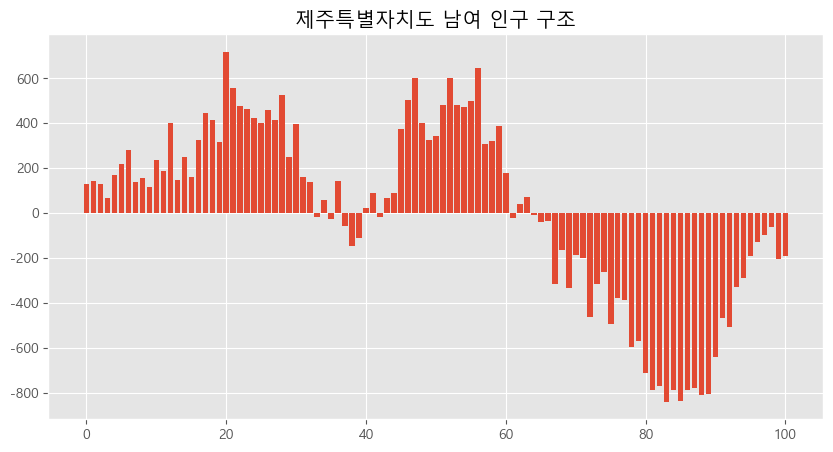

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/population_new_teacher.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

#남-여 데이터 만들기
result = male.values - female.values 

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

plt.title('{} 남여 인구 구조'.format(name))

plt.bar(range(101), result )

plt.show()
# 남성인구 - 여성인구. 윗부분이 남성이 많은 구간. 아랫부분이 여성이 많은 구간.

> * 60대를 기준으로 그 이하의 연령대는 남성이 많지만,
> * 60대 이상 인구는 여성이 많다는 것이 확연히 드러납니다. 

In [ ]:
# 연산을 하려고 인덱스명을 바꿔주려는 접근은 비효율적. 
# 값을 바로 뺄수있는 연산에 대해서 좀 더 고민해보는게 적절할 듯!


## scatter 차트

* 데이터의 관계를 파악하는 데 도움이 되는 산점도 그래프입니다. 
* 산점도는 가로축과 세로축을 기준으로 두 요소가 서로 어떤 관계를 맺고 있는지를 파악하기 쉽게 나타낸 그래프입니다. 

In [112]:
# 관계를 파악하는 것이 분석과 머신러닝에 중요함

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/population_new_teacher.csv',index_col=0, thousands = ',') # 컬럼0번째를 index_column으로 설정 

# 불필요한 데이터 삭제
del df['남_총인구수'], df['남_연령구간인구수']
del df['여_총인구수'], df['여_연령구간인구수']


#우리동네 데이터 추출
name = '제주특별자치도'
mytown = df[df.index.str.contains(name)] # 공백 데이터 처리

#남여 데이터 추출
male = mytown.iloc[0,0:101]
female = mytown.iloc[0,101:202]

#우리동네 연령별 총 인구수
total = []

for i in range(0,101):
    # print(mytown.iloc[0,i])
    total.append(mytown.iloc[0,i] + mytown.iloc[0,i+101])

<Figure size 1000x500 with 0 Axes>

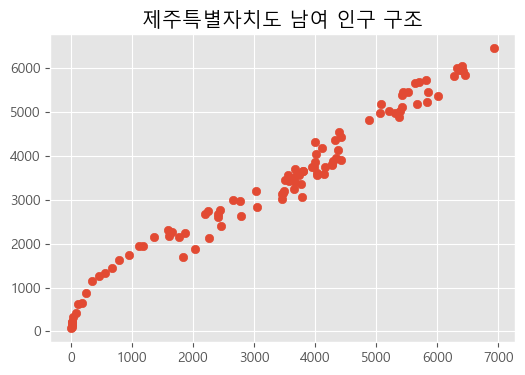

In [116]:
plt.figure(figsize=(10,5))
# plt.figure(figsize=(6,4))
plt.style.use('ggplot')
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

plt.title('{} 남여 인구 구조'.format(name))
# plt.xlabel('')
# plt.ylabel('')

plt.scatter(male, female)
plt.show()

In [118]:
# 우상향

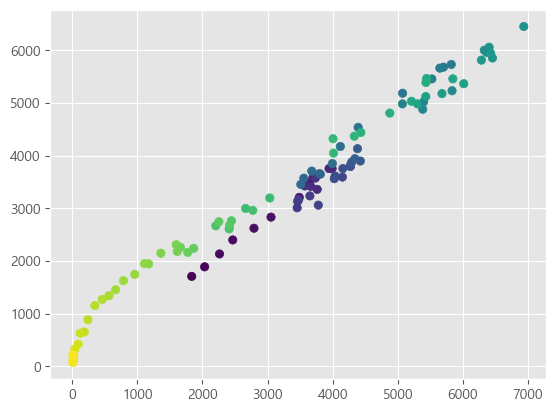

In [119]:
plt.scatter(male, female, c=range(101)) 
# 점(101개의 데이터)을 각각 다른 컬러로 표현해 가독성을 높임
plt.show()

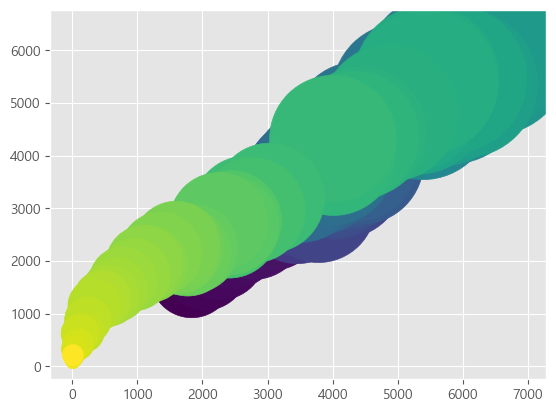

In [120]:
plt.scatter(male, female, c=range(101), s=total) 
# s : 데이터포인트(점)의 크기를 조절 -> 인구의 총합으로 조절하려고함
plt.show()

In [121]:
# 일부데이터만 보려고 슬라이싱으로 열어봄
total[:5]
# 데이터포인트크기가 크기때문에 축소하는 것이 적절하겠다.

[3542, 3921, 4395, 4864, 5412]

In [128]:
# 값을 줄이기. 머신러닝에서 다시 다룬다.
import math

size = []

for i in range(101):
    # print(math.sqrt(total[i]))
    size.append(math.sqrt(total[i])) 
    # sqrt 쓰는 이유 : 데이터 값의 크기를 줄이기 위해. 
    # 이외에도 나눗셈, 로그 등 다양한 방식으로 접근 가능
    # 데이터의 크기를 보고 적절한 방식으로 자의적 판단을 내리면 된다.


In [127]:
size[:5]

[59.51470406546604,
 62.617888817813075,
 66.29479617586888,
 69.74238309665078,
 73.56629663099808]

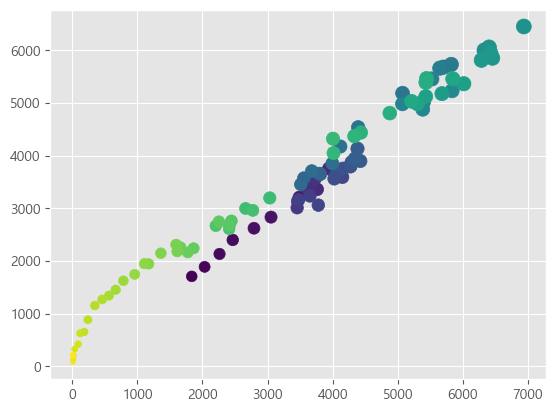

In [129]:
plt.scatter(male, female, c=range(101), s=size) 
# s : 데이터포인트(점)의 크기를 조절 -> 인구의 총합을 제곱근.
plt.show()

In [ ]:
# 너무 뭉개져서 나오는 것 보단 점점 형태로 나오는 것이 가독성이 좋으니깐

In [131]:
import math

size2 = []

for i in range(101):
    size2.append(total[i]/2) 
  

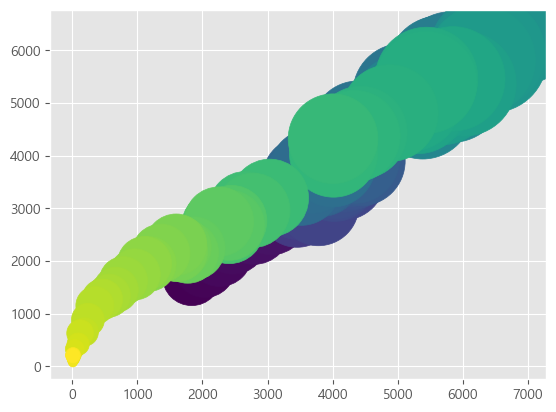

In [132]:
plt.scatter(male, female, c=range(101), s=size2) 
plt.show()

In [135]:
import math

size3 = []

for i in range(101):
    size3.append(total[i]/3) 
  

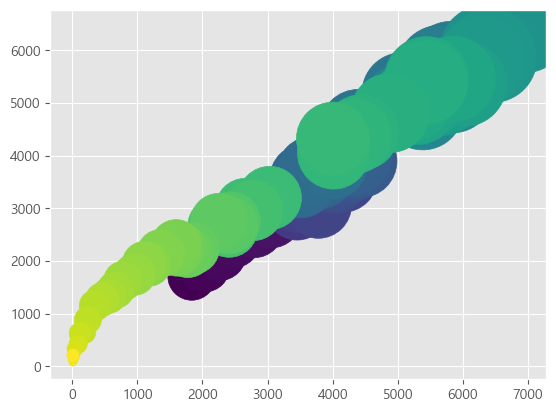

In [136]:
plt.scatter(male, female, c=range(101), s=size3) 
plt.show()

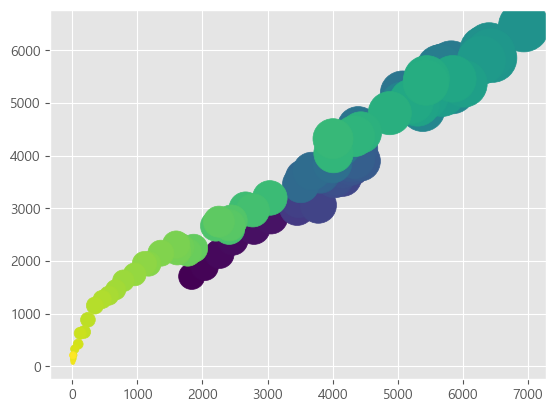

In [137]:
import math

size4 = []

for i in range(101):
    size4.append(total[i]/10) 
  
plt.scatter(male, female, c=range(101), s=size4) 
plt.show()

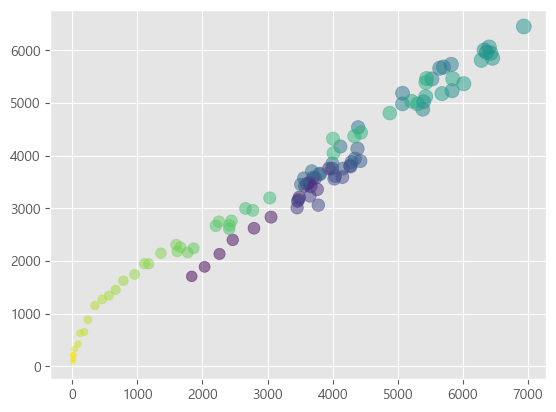

In [139]:
plt.scatter(male, female, c=range(101), s=size, alpha=0.5) 
# alpha : 투명도 조절
plt.show()

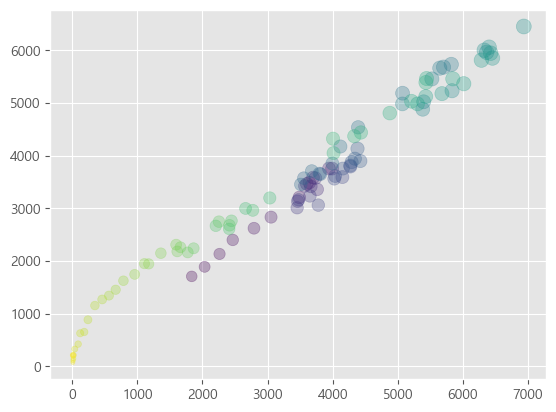

In [142]:
plt.scatter(male, female, c=range(101), s=size, alpha=0.3) 
# alpha : 투명도 조절 -> 0에 가까울수록 투명해진다.
plt.show()

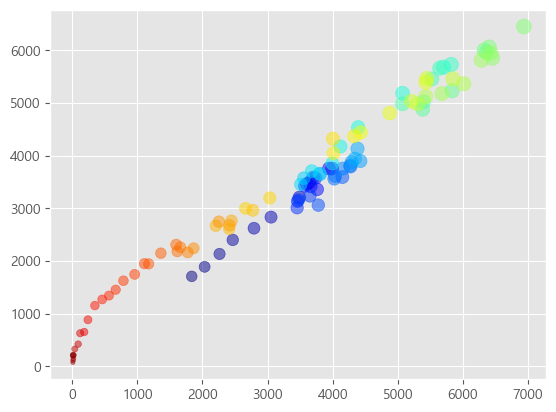

In [140]:
plt.scatter(male, female, c=range(101), s=size, alpha=0.5, cmap='jet') 
# cmap='jet' : 컬러맵
plt.show()

In [144]:
# 추세선 : 맵의 분석이 더 용이하게
# 남녀의 최대
max(male), max(female)

(6935, 6452)

In [145]:
# 남녀의 최소
min(male), min(female)

(10, 72)

In [147]:
max(total)/2, min(total)/2

(6693.5, 41.0)

In [150]:
ma=max(total)/2
mi=min(total)/2

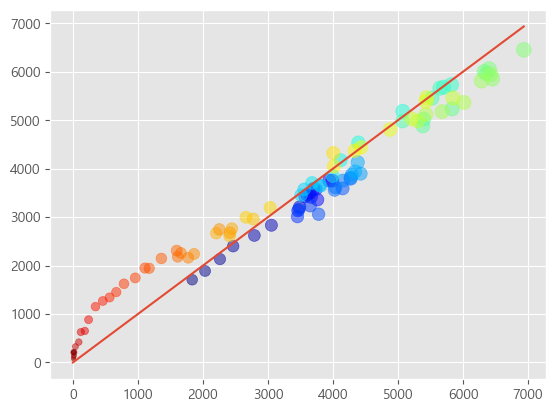

In [148]:
plt.scatter(male, female, c=range(101), s=size, alpha=0.5, cmap='jet') 

plt.plot(range(max(male))), range(max(male)) # 추세선 넣기: y=x 형태
plt.show()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

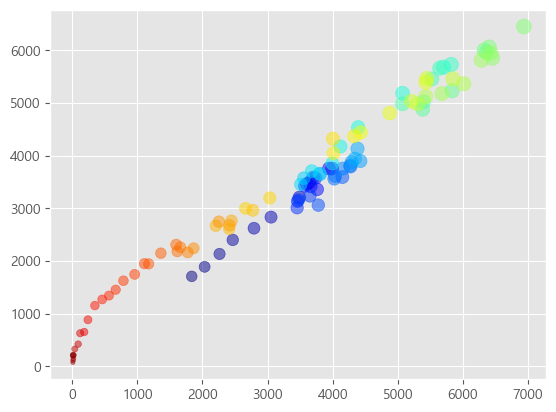

In [149]:
plt.scatter(male, female, c=range(101), s=size, alpha=0.5, cmap='jet') 

plt.plot(range(max(total)/2)), range(min(total)/2) # 추세선 넣기: y=x 형태
plt.show()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

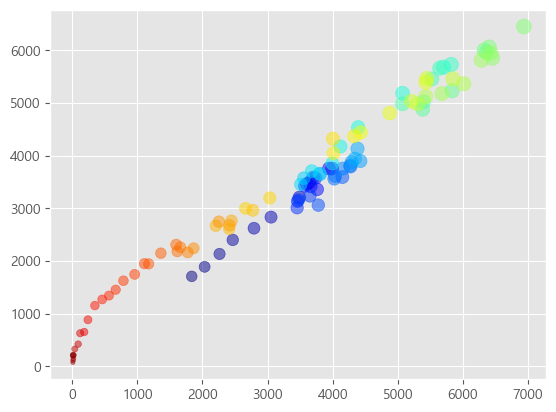

In [151]:
plt.scatter(male, female, c=range(101), s=size, alpha=0.5, cmap='jet') 

plt.plot(range(ma)), range(mi) # 추세선 넣기: y=x 형태
plt.show()